In [1]:
print("Hi!")

Hi!


In [20]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE ,MDS, LocallyLinearEmbedding,Isomap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import h5py
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif,SelectKBest,SelectFdr,f_regression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neural_network import MLPClassifier as MLPC

In [3]:
df = pd.read_csv("datasets/phase_3_TRAIN_7d499bff69ca69b6_6372c3e_MLPC2021_generic.csv")
df_challenge=pd.read_csv("datasets/phase_4_CHALLENGE_f042c3290b44b1ef_e2a955e_MLPC2021_generic.csv")

In [4]:
# drop target value, student annotations and string ID from input features:
X = df.drop(columns=['quadrant','mean_A','mean_V','id','score_mode','score_key_strength', 'quadrant'])

# we want to predict the quadrant:
y = df['quadrant']

In [5]:
df_challenge = df_challenge.drop(columns=['id'])
print(df_challenge.shape)
df_challenge.head()

(1190, 87)


,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,...,librosa_spectral_bandwidth_stdev,librosa_spectral_flatness_mean,librosa_spectral_flatness_stdev,midlevel_features_melody,midlevel_features_articulation,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness
0,0.095044,0.059303,4.363222,16.255108,3.3,0.483711,0.105291,791.174255,178.507248,1.526072,...,377.285879,0.000013,0.000015,0.274462,-0.171781,-0.279024,-0.041689,-0.439434,0.348059,-0.124695
1,0.125889,0.057642,3.058106,91.297142,3.4,0.469212,0.123577,768.057068,183.266342,3.728853,...,139.438996,0.000004,0.000004,0.234305,-0.117186,-0.198679,-0.015025,-0.399393,0.271292,0.000887
2,0.122135,0.059374,4.632260,10.177483,1.7,0.522440,0.098636,1356.725464,426.218903,0.922364,...,707.562829,0.000413,0.000438,0.222005,-0.322692,-0.355091,-0.094171,-0.361397,0.316675,-0.061305
3,0.166465,0.066223,2.765269,171.956894,4.8,0.585742,0.111520,835.932190,188.463242,6.529548,...,268.468795,0.000031,0.000038,0.041983,0.241189,-0.061846,0.018584,-0.234124,0.260259,-0.243865
4,0.144430,0.062011,3.318031,167.648773,2.8,0.566918,0.112361,688.516968,182.695404,5.961761,...,119.744602,0.000004,0.000003,0.069976,-0.157599,-0.267475,-0.074170,-0.220617,0.290546,0.022956


In [6]:
X.head()

,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,...,librosa_spectral_bandwidth_stdev,librosa_spectral_flatness_mean,librosa_spectral_flatness_stdev,midlevel_features_melody,midlevel_features_articulation,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness
0,0.206445,0.131383,13.998791,58.329521,3.1,0.539736,0.193987,3367.790527,3684.124268,2.986095,...,1781.705789,0.139911,0.248388,0.065397,-0.029380,-0.303987,-0.053306,-0.325228,0.347745,-0.119278
1,0.145753,0.057971,3.533264,75.166183,4.2,0.476832,0.123564,1395.528809,401.987610,4.181923,...,721.292781,0.000275,0.000484,0.353040,-0.073957,-0.381182,0.120750,-0.479266,0.451572,-0.064252
2,0.149111,0.059011,3.337368,82.753929,4.3,0.457741,0.132359,1318.759644,289.306152,4.303592,...,583.569947,0.000202,0.000314,0.201885,0.016944,-0.337422,0.103853,-0.388214,0.430684,-0.226197
3,0.163914,0.057474,3.078172,79.024742,4.1,0.504427,0.121134,1258.258423,262.561310,5.271147,...,575.961419,0.000202,0.000257,0.181998,-0.019165,-0.314282,0.118872,-0.335902,0.314371,-0.006619
4,0.157382,0.054116,2.682208,59.633064,3.9,0.503377,0.121658,1244.375122,260.756195,4.122828,...,539.887336,0.000217,0.000241,0.256362,-0.151648,-0.302913,-0.002940,-0.395495,0.368037,-0.162711


In [7]:
#create tags_dataframe:
X_tags=pd.DataFrame()
X_tags['id']=df['id']


#extract piece_id and pianist to later allow by piece/pianist/both cross validation
def extractPianist(x):
    return x[0:2]
def extract_piece_id(x):
    return x[3:5]
def extract_snippet_number(x):
    return x[6:9]

#get relevant information from dataframe
X_tags['Piece_id']=X_tags['id'].apply(extract_piece_id)
X_tags['Snippet_number']=X_tags['id'].apply(extract_snippet_number)
X_tags['class']=df['quadrant']

#get list of pianists and pieces!
piece_list=list(set(X_tags['Piece_id']))

In [8]:
#get distribution of classes per piece
piece_dist_list=[]
piece_dist_list_perecent=[]
for piece in piece_list:
    mylist=[]
    for i in range(4):
        mylist.append(len(X_tags.loc[(X_tags['Piece_id'] == piece) & (X_tags['class']==i+1)]))
    piece_dist_list.append(mylist)
    mylist=[element/sum(mylist) for element in mylist]
    piece_dist_list_perecent.append(mylist)
piece_dist_list

[[9, 0, 0, 0],
 [18, 0, 0, 0],
 [31, 0, 0, 0],
 [18, 0, 0, 0],
 [22, 0, 0, 0],
 [9, 0, 0, 0],
 [26, 0, 0, 0],
 [28, 0, 0, 0],
 [37, 0, 0, 0],
 [39, 0, 0, 0],
 [86, 0, 0, 0],
 [11, 0, 0, 0],
 [44, 0, 0, 0],
 [20, 0, 0, 0],
 [84, 0, 0, 0],
 [56, 0, 0, 0],
 [55, 0, 0, 0],
 [22, 0, 0, 0],
 [43, 0, 0, 0],
 [105, 0, 0, 0],
 [26, 0, 0, 0],
 [19, 0, 0, 0],
 [40, 0, 0, 0],
 [14, 0, 0, 0],
 [29, 0, 0, 0],
 [20, 0, 0, 0],
 [19, 0, 0, 0],
 [47, 0, 0, 0],
 [39, 0, 0, 0],
 [29, 0, 0, 0],
 [74, 0, 0, 0],
 [7, 0, 0, 0],
 [42, 0, 0, 0],
 [49, 0, 0, 0],
 [33, 0, 0, 0],
 [77, 0, 0, 0]]

In [9]:
#selected_list=[,'15','18','29','09','18','29','03','31','22']#yes adding piece indices multiple times 
# does do upsampling
selected_list=['14', '03', '34',  '28', '29',  '21','38','11', 
               '25',  '26', '02', '41', '15',  '36', '16', '19', '20', 
               '27', '39', '30', '24', '04', '12', '22', '35', '47', '18', 
               '45', '37']#emoved:'08',   
Train_Snippets=[]
#and create horizontal splits:
for i,piece in enumerate(selected_list):
    vetrical_mask_train=np.zeros(0).astype(int)

    mask= X_tags[X_tags['Piece_id']==selected_list[i]].index.values.astype(int)
    vetrical_mask_train=np.concatenate((vetrical_mask_train,mask), axis=0)

    #print(vetrical_mask_test)
    #print(vetrical_mask_train)
    trainIndices=vetrical_mask_train
    
    [Train_Snippets.append(index) for index in trainIndices]


In [10]:
#double_checking:
temp_df=X_tags.iloc[Train_Snippets]

#get class distributions
class_dist_list=[]
for i in range(4):
    class_dist_list.append(len(temp_df.loc[temp_df['class']==i+1]))
print(class_dist_list)
max_snippets= max(class_dist_list)
print(f'maximum snippets { max(class_dist_list)}')

[1059, 0, 0, 0]
maximum snippets 1059


In [11]:
#creating inverse test set:
print(len(X_tags))
#create_indices
indices=[]
for i in range(len(X_tags)):
    indices.append(i)

#masking the right inidices:
temp_test = np.ones(len(X_tags), np.bool)
temp_test[Train_Snippets] = 0




Test_Snippets=[b for a, b in zip(temp_test, indices) if a]
org_Test_Snippets=Test_Snippets

print(len(Test_Snippets))

2607
520


<ipython-input-11-4f0453ca7d8a>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  temp_test = np.ones(len(X_tags), np.bool)


In [12]:
X_test=X.iloc[Test_Snippets]
X_train=X.iloc[Train_Snippets]
df_challenge#is just as it is

y_train = df['quadrant'].values
y_train=np.float32(y_train)

y_test=y_train[Test_Snippets]
y_train=y_train[Train_Snippets]


#### Now we use SelectKBest + TSNE +KNN for prediction:

In [13]:
final_score_and_prediction=[]


In [14]:
np.random.randint(4,20,1)



array([4])

Started TSNE
Start plotting


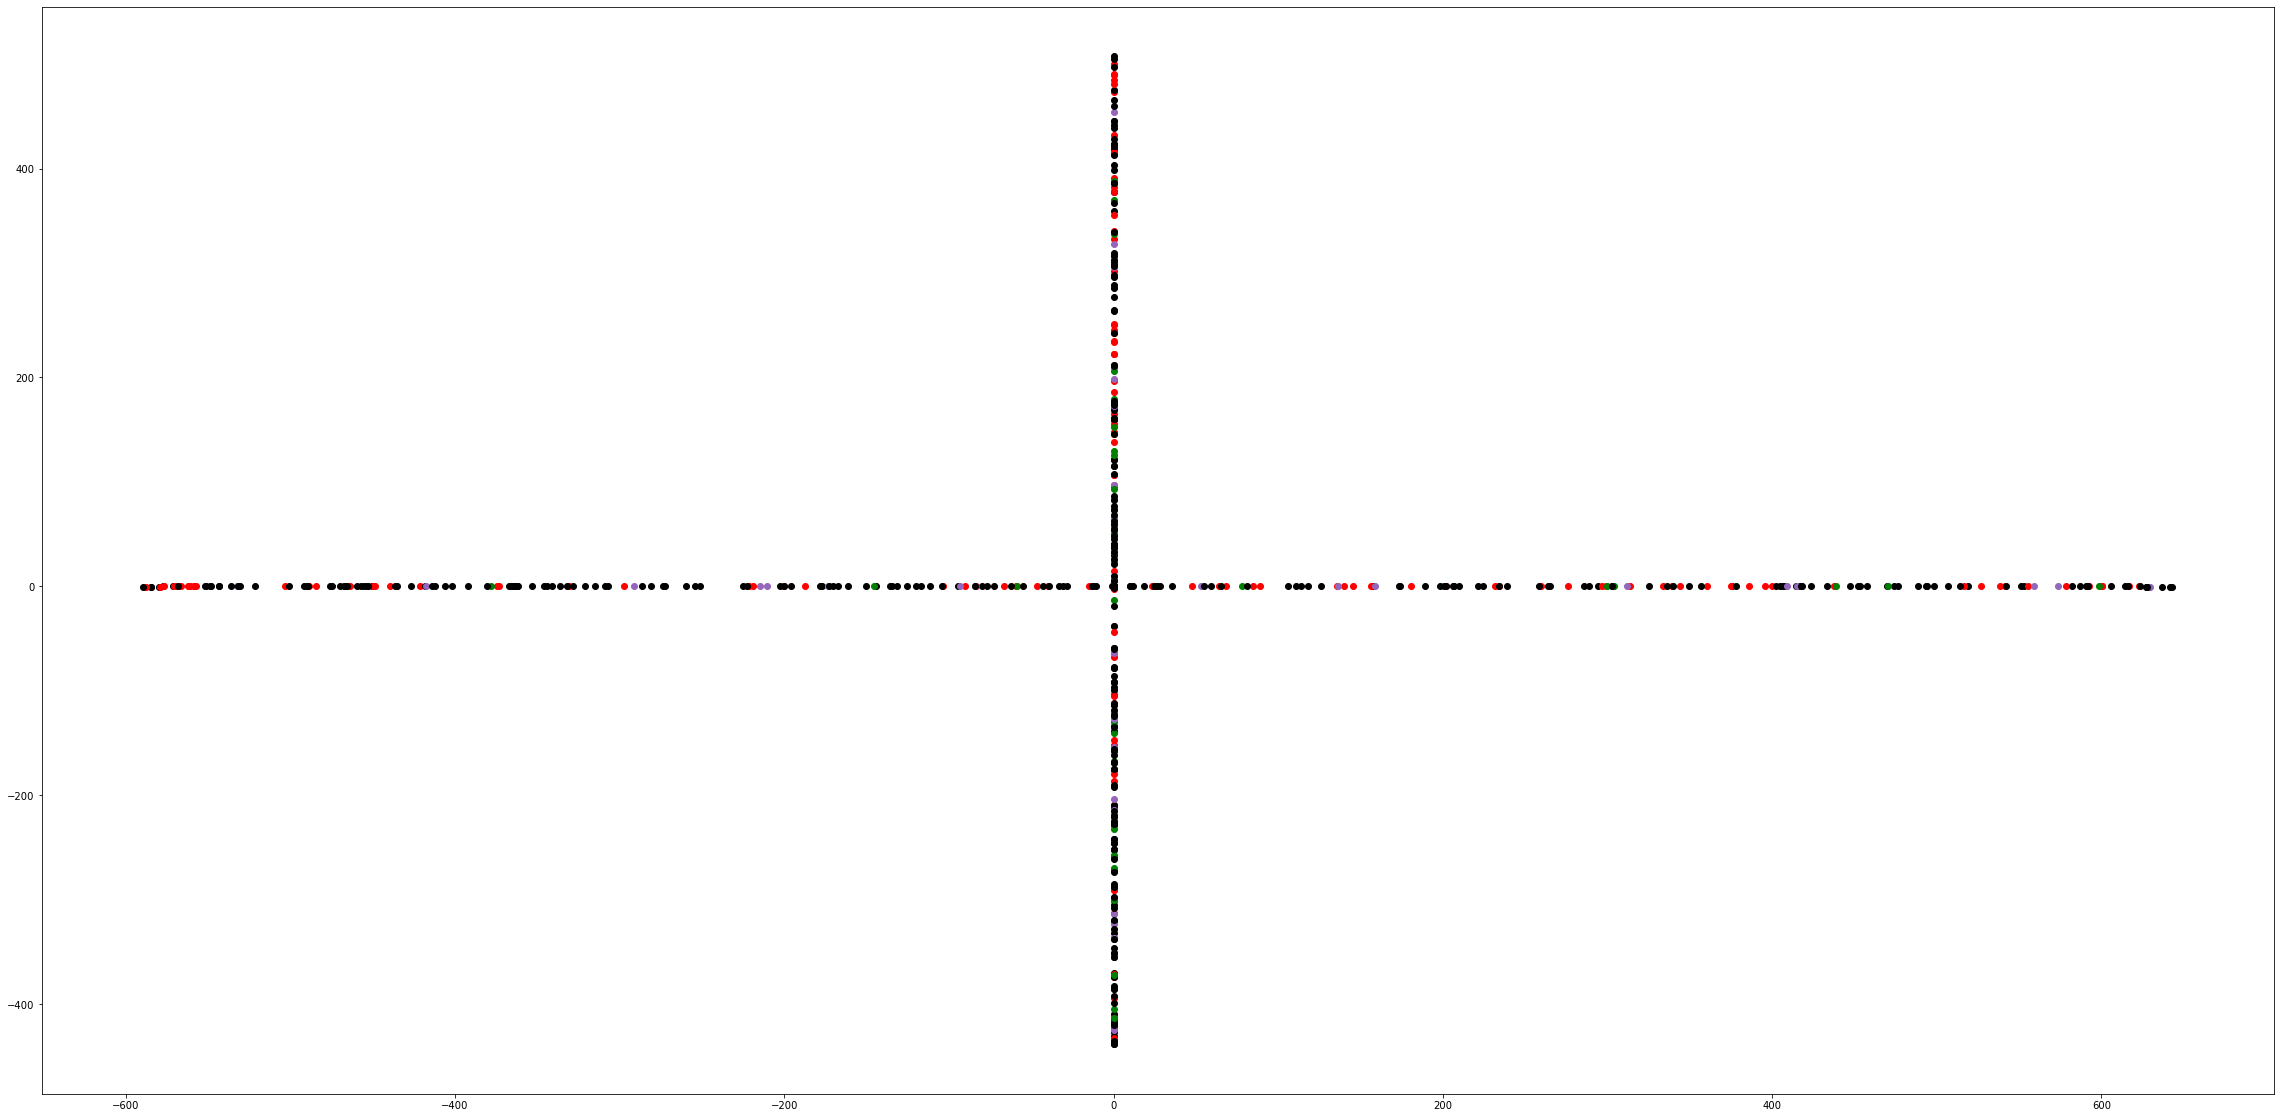

0.5440151994933502 with k=1
Started TSNE
Start plotting


KeyboardInterrupt: 

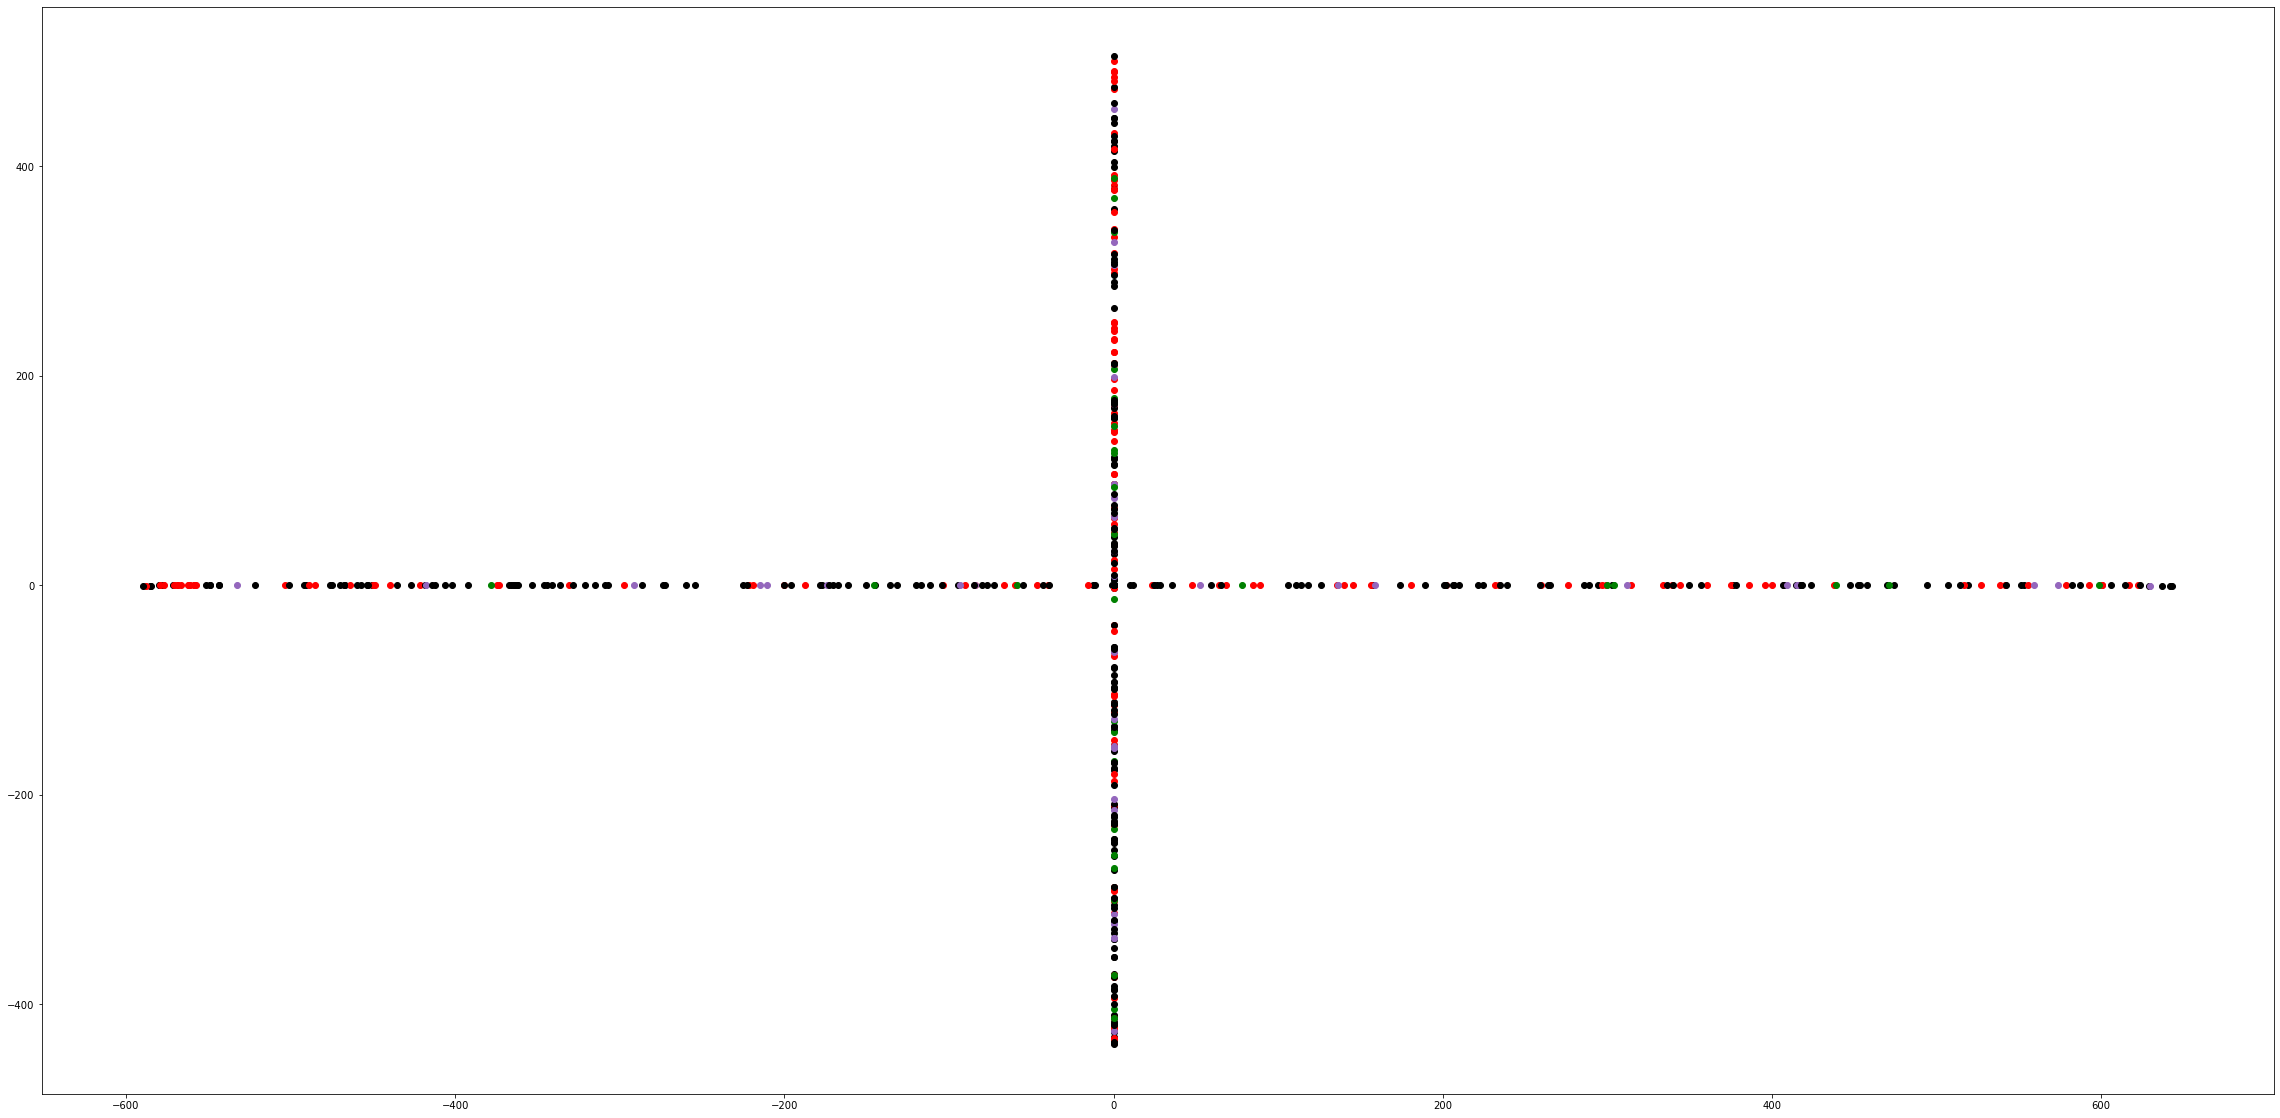

In [21]:
for i in range(100):
    pca_dim=14
    
    num_selceted=5#np.random.randint(5,25,1)[0]
    low_embeeding=2 #dimensions
    

    selector=SelectKBest(mutual_info_classif, k=num_selceted)
    X_new = selector.fit_transform(X_train, y_train)    

    
    sel_X_train=selector.transform(X_train)
    sel_X_chal=selector.transform(df_challenge)
    sel_X_test=selector.transform(X_test)



    #normalization
    mean=np.sum(sel_X_train, axis=0)
    mean+=np.sum(sel_X_chal, axis=0)
    mean+=np.sum(sel_X_test, axis=0)
    length=len(sel_X_train)+len(sel_X_chal)+len(sel_X_test)
    mean=mean/length

    var=np.var(sel_X_train, axis=0)
    var+=np.var(sel_X_chal, axis=0)
    var+=np.var(sel_X_test, axis=0)
    std=(var/length)**1/2

    #sel_X_train=np.divide(sel_X_train-mean,std)
    #sel_X_test=np.divide(sel_X_test-mean,std)
    #sel_X_chal=np.divide(sel_X_chal-mean,std)
    
    X_Stacked=np.vstack((sel_X_train,sel_X_test))
    X_Stacked=np.vstack((X_Stacked,sel_X_chal))
    y_stacked=np.zeros(len(y_train)+len(y_test)+len(sel_X_chal))
    y_stacked[:]=9
    #print(y_stacked)

    for i in range(len(y_train)+len(y_test)):
        if i<len(y_train):
            '''
            #optional only trying to classify 2 classe
            if y_train[i]==2:
                y_stacked[i]=1
            elif y_train[i]==4:
                y_stacked[i]=3
            else:
            '''
            y_stacked[i]=y_train[i]
        else:
            y_stacked[i]=y_test[i-len(y_train)]+4

            
    print("Started TSNE")
    tsne=Isomap()
    proj=tsne.fit_transform(X_Stacked,y_stacked)
    
    print("Start plotting")
    plt.figure(figsize=(40,20))
    colors = ['r','y','b','g',
              'tab:purple','tab:orange','tab:cyan','tab:green',
              'k']
    for j in range(len(proj)):
                plt.scatter(proj[j][0], proj[j][1],color=colors[y_stacked[j].astype(int)-1])
    plt.show()
    
    
    #need to seperate this proection into X_train and X_test and X_challenge
    projected_train=np.zeros((len(X_train),low_embeeding))#the 2 is here because we peojected to 2d space!
    projected_test=np.zeros((len(X_test),low_embeeding))
    projected_challenge=np.zeros((len(sel_X_chal),low_embeeding))
    for i in range(len(proj)):
        if i<len(X_train):
            projected_train[i]=proj[i]
        elif i<len(X_train)+len(X_test):
            projected_test[i-len(X_train)]=proj[i]#
        else:
            projected_challenge[i-(len(X_train)+len(X_test))]=proj[i]
    #print(num_selceted)
    #print(projected_train.shape)
    #print(projected_test.shape)
    #print(projected_challenge.shape)
    #print(projected_challenge)
    #print(len(proj))
    
    #creating equal to original distribution in TestSet! using upsampling

    #all snippets that are in the training set:
    temp_df=X_tags.iloc[org_Test_Snippets]
    org_temp_df=X_tags

    #get class distributions
    test_class_dist=[]
    org_class_dist=[]

    total_difference=0
    for i in range(4):
        org_class_dist.append(len(org_temp_df.loc[org_temp_df['class']==i+1]))
        test_class_dist.append(len(temp_df.loc[temp_df['class']==i+1]))
        total_difference+=(org_class_dist[i]-test_class_dist[i])
    #print(org_class_dist)
    #print(test_class_dist)
    max_snippets= max(test_class_dist)
    #print(f'maximum snippets { max(test_class_dist)}')

    #randomly duplicate snippets in small classes to reach even distribution:

    #generate a mask:
    mask=np.array(range(len(projected_test)))
    additional_test_set=[]
    additional_y_set=[]
    #print(total_difference)

    additional_test=np.array((len(projected_test)))

    for i in range(4):
        #print(org_class_dist[i]-test_class_dist[i])
        dup_num= org_class_dist[i]-test_class_dist[i]
        if(dup_num>0):
            temp_list=np.random.choice(mask, size=dup_num, replace=True)
            #print(temp_list)
            [additional_test_set.append(projected_test[index]) for index in temp_list]
            [additional_y_set.append(y_test[index]) for index in temp_list]

    additional_test_set=np.array(additional_test_set)
    #print(len(additional_test_set))
    #print(len(additional_y_set))
    
    X_Stacked_new=np.vstack((projected_test,additional_test_set))
    y_stacked_new=np.zeros(len(y_test)+len(additional_y_set))

    for i in range(len(y_test)+len(additional_y_set)):
        if i<len(y_test):
            y_stacked_new[i]=y_test[i]
        else:
            y_stacked_new[i]=additional_y_set[i-len(y_test)]
            
            
            
    max_score=-np.inf
    the_k=0
    for k in range(1,31,2):
        knn=KNN(n_neighbors=k)
        knn.fit(projected_train,y_train.astype(int))
        score=knn.score(X_Stacked_new,y_stacked_new.astype(int))
        if score > max_score:
            max_score=score
            challenge_prediction=knn.predict(projected_challenge)
            the_k=k
            
    final_score_and_prediction.append((k,max_score,challenge_prediction))
    print(f'{max_score} with k={the_k}')

In [ ]:
'''
plt.figure(figsize=(40,20))
colors = ['1','1','1','1',
          '1','1','1','1',
          'k']
for j in range(len(proj)):
            plt.scatter(proj[j][0], proj[j][1],color=colors[y_stacked[j].astype(int)-1])
plt.show()
'''

#### to get a more accurate prediction we need to upsample the test set to the original distribution!

In [49]:
final_score_and_prediction

[(-1, 0.5357821405953135, array([0, 1, 1, ..., 0, 1, 1])),
 (-1, 0.5427485750474984, array([0, 1, 1, ..., 0, 1, 1])),
 (-1, 0.5053831538948702, array([1, 0, 0, ..., 1, 1, 0])),
 (-1, 0.5433818872704244, array([0, 0, 1, ..., 0, 1, 1])),
 (-1, 0.5414819506016466, array([0, 0, 1, ..., 0, 1, 1])),
 (-1, 0.525649145028499, array([0, 0, 1, ..., 0, 1, 1])),
 (33, 0.5402153261557948, array([0, 0, 1, ..., 0, 1, 1])),
 (33, 0.5446485117162762, array([0, 0, 1, ..., 0, 1, 1])),
 (49, 0.5281823939202026, array([0, 1, 1, ..., 0, 1, 1])),
 (49, 0.5047498416719443, array([0, 0, 1, ..., 0, 1, 1])),
 (49, 0.5231158961367954, array([1, 1, 0, ..., 1, 1, 0])),
 (49, 0.5421152628245726, array([1, 0, 0, ..., 1, 1, 0])),
 (49, 0.5484483850538315, array([0, 1, 0, ..., 1, 1, 0])),
 (49, 0.5414819506016466, array([0, 1, 0, ..., 1, 1, 0])),
 (49, 0.5541481950601647, array([0, 1, 0, ..., 1, 1, 0])),
 (49, 0.5433818872704244, array([1, 1, 0, ..., 1, 1, 0])),
 (49, 0.5269157694743508, array([1, 1, 0, ..., 1, 1, 0]))

In [58]:
best=max(final_score_and_prediction, key=lambda x:x[1])
print(best)

(29, 0.5687143761874605, array([1, 0, 1, ..., 1, 0, 1]))


In [59]:
best=np.array(best)

<ipython-input-59-3b3f482645ff>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  best=np.array(best)


In [60]:
best[2]

array([1, 0, 1, ..., 1, 0, 1])

In [61]:
df_challenge=pd.read_csv("datasets/phase_4_CHALLENGE_f042c3290b44b1ef_e2a955e_MLPC2021_generic.csv")['id']
df_challenge.head()

0    flagellates
1    adjudicates
2    crowdfunded
3    easternmost
4    dispatchers
Name: id, dtype: object

In [62]:
df_challenge[0]

'flagellates'

In [63]:
data=[]
for i,pred in enumerate(best[2]):
    data.append([df_challenge[i],pred])

In [64]:
df_challenge=pd.DataFrame(data, columns = ['id', 'quadrant'])
df_challenge.head()

,id,score_mode
0,flagellates,1
1,adjudicates,0
2,crowdfunded,1
3,easternmost,1
4,dispatchers,1


In [65]:
df_challenge.to_csv(path_or_buf='quadrant.csv',index=False)